In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Random Walks

* Random walks have many applications:

    * Stock prices
    * Diffusion processes

* Fun subject to understand simulations

### The simple random walk in 1D


In [4]:
# Random walk in 1D: 
# flip a coin, take a step based on value
 
n = 100000 # define the number of steps

In [5]:
x = np.zeros(n) 
x[0] = 0
p = 0.5

# simulate the walk 
for i in range(1, n):
    val = np.random.random() # generate random number on [0,1) 
    if val >= p: # Head
        x[i] = x[i - 1] + 1
    else:          # Tail
        x[i] = x[i - 1] - 1

After 100000 steps, final position -443.0 


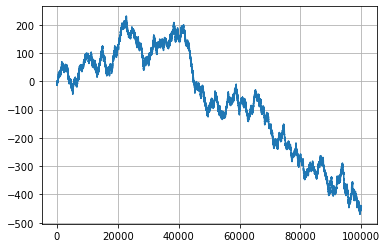

In [6]:
plt.plot(range(n), x)  
plt.grid()

print(f"After {n} steps, final position {x[-1]} ")

How are these values distributed?

In [7]:
# Random walk in 2D
# define the number of steps 
n = 1000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = np.zeros(n) 
y = np.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = np.random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1  # east
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1  # west
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1  # north
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1  # south


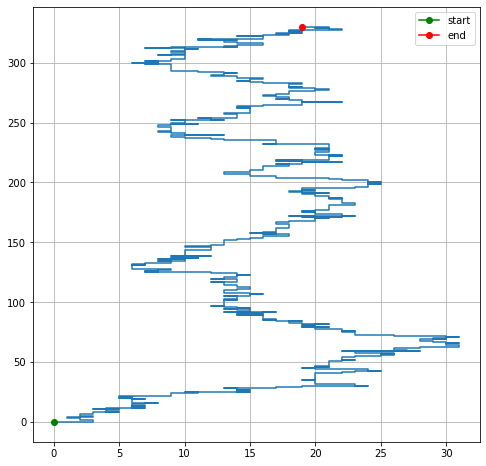

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(x, y)
ax.grid()
_ = ax.plot(x[0], y[0], c='g', marker='o', label='start')
_ = ax.plot(x[n-1], y[n-1], c='r', marker='o', label='end')
ax.legend()

---
---

#### 1D random walk analysis

In [9]:
def random_walk_1d(n):
    """ Simulate an n-step random walk"""
    
    p = 0.5 # probability to flip a fair coin
    
    # start at position 0
    position = np.zeros(n)

    for i in range(n-1):
        # choose number between 0 and 1
        num = np.random.rand()
        if num >= 0.5:
            position[i+1] = position[i] + 1 # right
        else:
            position[i+1] = position[i] - 1 # left
 
    return position
    

In [10]:
n = 10000 # define the number of steps
  
x = random_walk_1d(n) 

print(f"After {n} steps, final position {x[-1]} ")

mean_x = np.mean(x)
std_x = np.std(x)
print(mean_x)
print(std_x)

# If you re-run this cell you will get differeent results

After 10000 steps, final position 37.0 
-14.7206
31.197646315707857


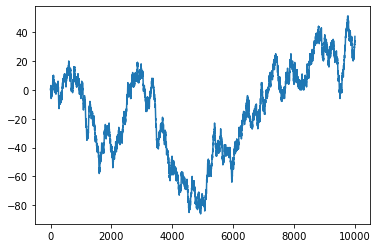

In [11]:
_ = plt.plot(x)

This is a single __random__ sample of a random walk!

In [12]:
n = 1000
num_walks = 10
walks = np.zeros((num_walks, n))

for i in range(len(walks)):
    walks[i,:] = random_walk_1d(n) 

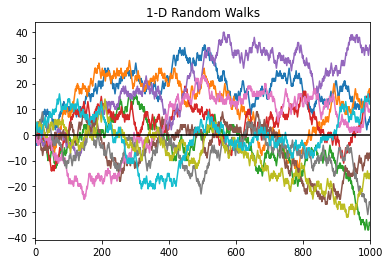

In [13]:
for i in range(num_walks):
    _ = plt.plot(walks[i,:])
    
plt.title("1-D Random Walks")
plt.xlim([0, n])
_ = plt.axhline([0], color="k")

This is a __random__ sample of random walks!

#### Properties of the 1D random walk

* zero mean
* dispersion which increases with number of steps, as $\sqrt{N_{steps}}$

Let's look at mean square distance

\begin{equation}
msd = \frac{1}{N}\sum_i^N d_i^2
\end{equation}


In [14]:
# Simulate 2000 walks, 1000 steps each
n_steps = 1000
num_walks = 2000
walks = np.zeros((num_walks, n_steps))

for i in range(num_walks):
    walks[i,:] = random_walk_1d(n_steps) 

In [15]:
# Compute mean square distance of final position
diff = walks[:,-1]
sq_diff = diff*2
msd = np.mean(sq_diff)

print("MSD: ",msd)
print("Dispersion: ",np.sqrt(n_steps))

MSD:  1.9
Dispersion:  31.622776601683793


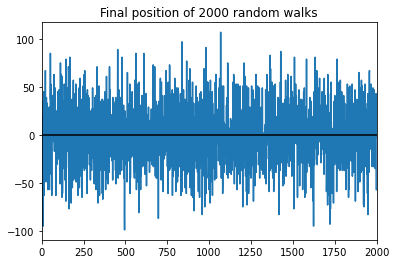

In [16]:
_ = plt.plot(diff)
plt.title("Final position of "+str(num_walks)+" random walks")
plt.xlim([0, num_walks])
_ = plt.axhline([0], color="k")

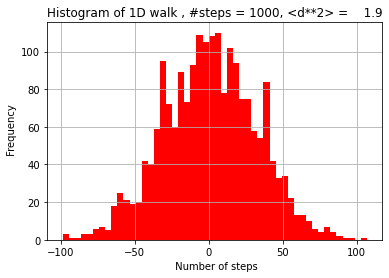

In [17]:
plt.title('Histogram of 1D walk , #steps = %i, <d**2> = %6.1f' % (n_steps, msd))
plt.hist(diff, bins=50, color='red') 
plt.xlabel(' Number of steps')
plt.ylabel(' Frequency')
plt.grid()

What can we conclude from the random walk simulation?